In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [2]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

2024-12-05 00:09:38.346346: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 00:09:38.812160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733357378.983404     732 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733357379.033282     732 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 00:09:39.542577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
from tensorflow.keras.preprocessing.image import load_img

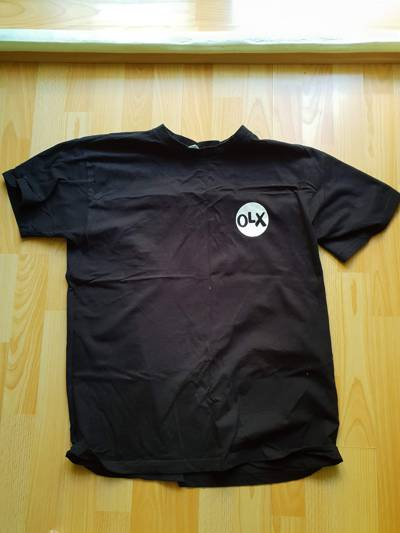

In [6]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [7]:
img = load_img(fullname, target_size=(299, 299))

In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [38]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [12]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1733357690.536476     732 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
X = np.array([x])

In [14]:
X.shape

(1, 299, 299, 3)

In [15]:
X = preprocess_input(X)

In [16]:
pred = model.predict(X)

I0000 00:00:1733357819.660834    1681 service.cc:148] XLA service 0x7f6ee4003740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733357819.661320    1681 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-05 00:16:59.713173: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733357820.070736    1681 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 00:17:01.647880: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1733357822.487079    1681 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [17]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564))]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [20]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [21]:
X, y = next(train_ds)

In [22]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [24]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.5972 - loss: 1.6522 - val_accuracy: 0.7419 - val_loss: 0.9959
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8138 - loss: 0.6012 - val_accuracy: 0.7566 - val_loss: 1.0612
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8844 - loss: 0.3401 - val_accuracy: 0.7566 - val_loss: 0.9007
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9204 - loss: 0.2085 - val_accuracy: 0.8006 - val_loss: 0.9003
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9406 - loss: 0.1605 - val_accuracy: 0.7918 - val_loss: 0.9896
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9381 - loss: 0.1730 - val_accuracy: 0.7859 - val_loss: 1.1711
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9646 - loss: 0.0864 - val_accuracy: 0.7889 - val_loss: 1.1041
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9686 - loss: 0.0877 - val_accuracy: 0.7801 - val_loss: 

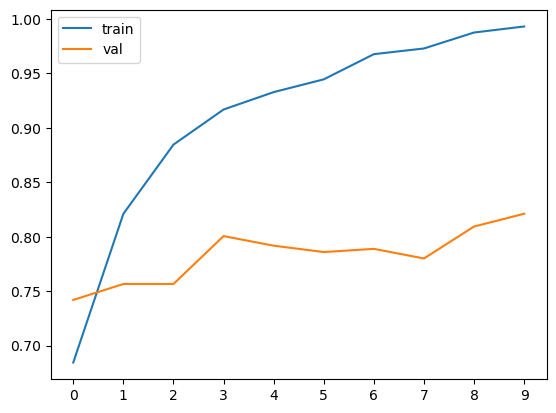

In [31]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [32]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [33]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.2727 - loss: 2.1666 - val_accuracy: 0.4868 - val_loss: 1.6179
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5445 - loss: 1.4410 - val_accuracy: 0.5924 - val_loss: 1.2662
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6200 - loss: 1.1858 - val_accuracy: 0.6628 - val_loss: 1.0874
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6873 - loss: 1.0165 - val_accuracy: 0.7185 - val_loss: 0.9850
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6918 - loss: 0.9307 - val_accuracy: 0.7214 - val_loss: 0.9026
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7346 - loss: 0.8282 - val_accuracy: 0.7537 - val_loss: 0.8485
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7607 - loss: 0.7771 - val_accuracy: 0.7537 - val_loss: 0.8096
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7527 - loss: 0.7647 - val_accuracy: 0

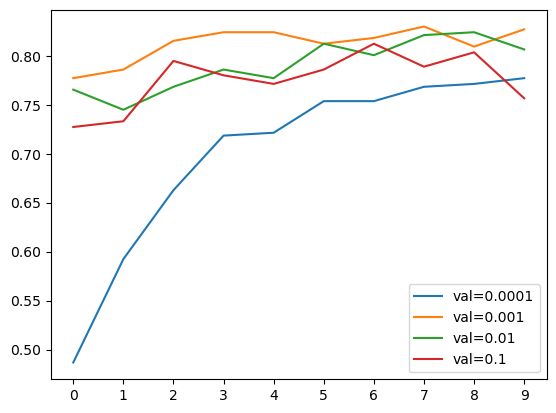

In [34]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [35]:
del scores[0.1]
del scores[0.0001]

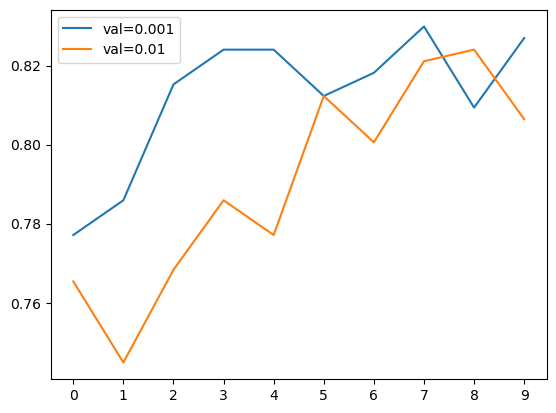

In [36]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [37]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [43]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [44]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.5255 - loss: 1.4245 - val_accuracy: 0.7947 - val_loss: 0.6910
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7861 - loss: 0.6447 - val_accuracy: 0.8094 - val_loss: 0.6033
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8586 - loss: 0.4607 - val_accuracy: 0.7859 - val_loss: 0.5912
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8832 - loss: 0.4141 - val_accuracy: 0.8152 - val_loss: 0.5404
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8927 - loss: 0.3519 - val_accuracy: 0.8152 - val_loss: 0.5353
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9028 - loss: 0.3168 - val_accuracy: 0.8299 - val_loss: 0.5249
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9326 - loss: 0.2643 - val_accuracy: 0.8240 - val_loss: 0.5374
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9452 - loss: 0.2347 - val_accuracy: 0.8270 -

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [45]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [46]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.3853 - loss: 1.7540 - val_accuracy: 0.5982 - val_loss: 1.1391
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6359 - loss: 1.0154 - val_accuracy: 0.7478 - val_loss: 0.7952
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7693 - loss: 0.6937 - val_accuracy: 0.7859 - val_loss: 0.6731
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8147 - loss: 0.5304 - val_accuracy: 0.8065 - val_loss: 0.5969
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8713 - loss: 0.4203 - val_accuracy: 0.7977 - val_loss: 0.5945
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8814 - loss: 0.3705 - val_accuracy: 0.8240 - val_loss: 0.5730
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9117 - loss: 0.3118 - val_accuracy: 0.8006 - val_loss: 0.5601
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9330 - loss: 0.2681 - val_accuracy: 0.785

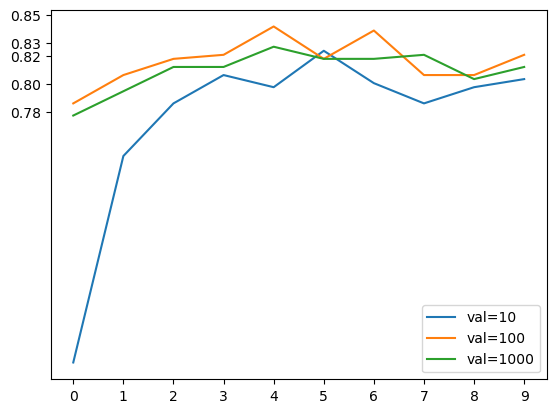

In [50]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.83, 0.85])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [51]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [52]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.5646 - loss: 1.3037 - val_accuracy: 0.7654 - val_loss: 0.6916
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7993 - loss: 0.5563 - val_accuracy: 0.8035 - val_loss: 0.6136
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8777 - loss: 0.3625 - val_accuracy: 0.8094 - val_loss: 0.5647
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9234 - loss: 0.2480 - val_accuracy: 0.8211 - val_loss: 0.5596
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9462 - loss: 0.1853 - val_accuracy: 0.8211 - val_loss: 0.5609
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9719 - loss: 0.1184 - val_accuracy: 0.8358 - val_loss: 0.5762
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9870 - loss: 0.0796 - val_accuracy: 0.8035 - val_loss: 0.6124
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9963 - loss: 0.0587 - val_accuracy: 0.83

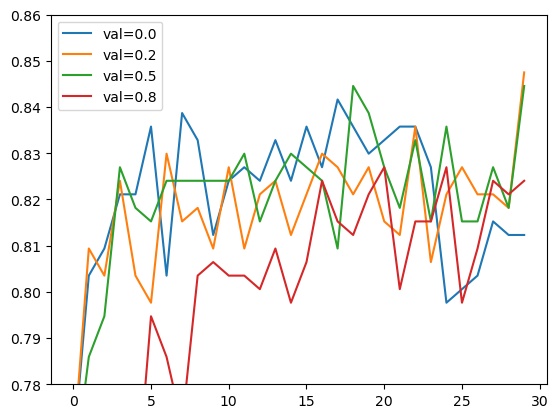

In [53]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

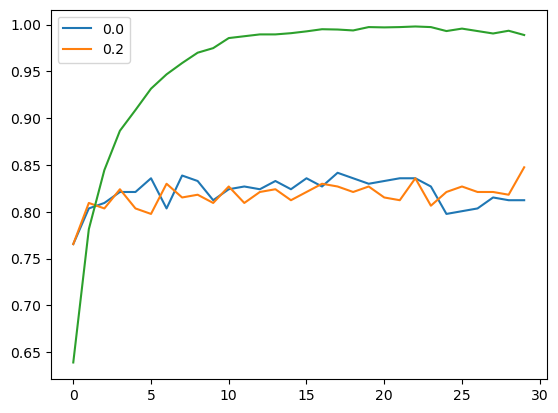

In [58]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [60]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.5292 - loss: 1.3800 - val_accuracy: 0.7625 - val_loss: 0.6593
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7846 - loss: 0.6097 - val_accuracy: 0.7947 - val_loss: 0.5882
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8356 - loss: 0.4671 - val_accuracy: 0.8328 - val_loss: 0.5282
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8848 - loss: 0.3406 - val_accuracy: 0.8416 - val_loss: 0.5028
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9182 - loss: 0.2556 - val_accuracy: 0.8182 - val_loss: 0.5166
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9347 - loss: 0.2153 - val_accuracy: 0.8240 - val_loss: 0.5771
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9543 - loss: 0.1671 - val_accuracy: 0.8299 - val_loss: 0.5258
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9648 - loss: 0.1379 - val_accuracy: 0.8416 - val_loss: 

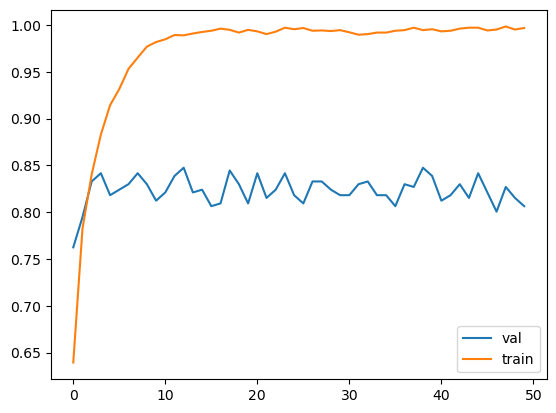

In [61]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [62]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [63]:
input_size = 299

In [64]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [66]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [67]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2024-12-05 01:25:06.749862: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


91/96 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - accuracy: 0.5316 - loss: 1.4209

2024-12-05 01:26:07.515661: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.5390 - loss: 1.3997

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-05 01:26:26.607322: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.18GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 95s 835ms/step - accuracy: 0.5404 - loss: 1.3956 - val_accuracy: 0.8270 - val_loss: 0.5526
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 619ms/step - accuracy: 0.8085 - loss: 0.5604 - val_accuracy: 0.8475 - val_loss: 0.4854
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 625ms/step - accuracy: 0.8530 - loss: 0.4332 - val_accuracy: 0.8534 - val_loss: 0.4301
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 622ms/step - accuracy: 0.8731 - loss: 0.3900 - val_accuracy: 0.8622 - val_loss: 0.4074
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 626ms/step - accuracy: 0.8818 - loss: 0.3518 - val_accuracy: 0.8680 - val_loss: 0.4019
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 624ms/step - accuracy: 0.8885 - loss: 0.3207 - val_accuracy: 0.8915 - val_loss: 0.3733
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.9002 - loss: 0.2869 - val_accuracy: 0.8886 - val_loss: 0.3576
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 619ms/step - accuracy: 0.8966 - loss: 0.2923 - val_accuracy: 0.879

KeyboardInterrupt: 

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [70]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [71]:
model = keras.models.load_model('xception_v4_1_16_0.894.h5.keras')

In [72]:
model.evaluate(test_ds)

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.8631 - loss: 0.3715

2024-12-05 01:50:40.540859: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.15GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 898ms/step - accuracy: 0.8684 - loss: 0.3565


[0.27386781573295593, 0.897849440574646]

In [73]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [74]:
img = load_img(path, target_size=(299, 299))

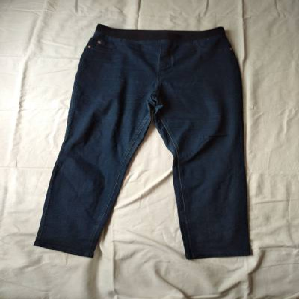

In [82]:
img

In [83]:
import numpy as np

In [84]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [85]:
X = preprocess_input(X)

In [86]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [87]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [88]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-3.4601204),
 'hat': np.float32(-5.3379374),
 'longsleeve': np.float32(-1.4151933),
 'outwear': np.float32(-2.5436003),
 'pants': np.float32(9.946134),
 'shirt': np.float32(-2.5543344),
 'shoes': np.float32(-5.342899),
 'shorts': np.float32(3.488963),
 'skirt': np.float32(-5.408345),
 't-shirt': np.float32(-1.9553442)}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

